# Imports

In [3]:
import logging, math, os
from pathlib import Path
from base64 import b64encode

import cv2 # Library for computer vision.
import numpy as np
import torch # Package with framework for Machine Learning with GPU acceleration based on numpy. Used for working with Tensors (generalisation of Matrix to n amount of dimensions).
import matplotlib.pyplot as plt # Graphs in python

from transformers import CLIPTextModel, CLIPTokenizer # Package with library of transformers implementations (state-of-the-art model for NLP). Used for tokenization of text and Autoencoder Model.
from diffusers import StableDiffusionImg2ImgPipeline # Package with library of Stable Diffusion implementations (state-of-the-art model text2img generation). Heart of this Notebook.
from PIL import Image # Package for image manipulation. Used mainly to read image and put it to numpy format.

logging.disable(logging.WARNING)

image_name_no_extension = "wioleta_paryz_512"
image_extension = "jpg"
image_name = f"{image_name_no_extension}.{image_extension}"
device = "cuda"

DS_PATH = './datasets'

FRAMES_PATH = '/frames'
ORIGINAL_SINGLE_IMAGES = '/original_single_images'
ORIGINAL_F_PATH = '/original_frames'
IMAGE_GRIDS = '/image_grids'
AI_STYLIZED_F_PATH = '/ai_stylized_frames'
AI_STYLIZED_SINGLE_IMAGES = '/stylized_single_images'

VIDEO_PATH = '/video'
INP_VID_PATH = '/input_video'
OUT_VID_PATH = '/output_video'

# Pipeline Definition

In [4]:
img_2_img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained("./stable-diffusion-2-base/", torch_dtype=torch.float16) # Load the model from HD to RAM with lower precision.
device = "cuda"
_ = img_2_img_pipe.to(device) # Load the model from RAM to VRAM (GPU)

# Tinkering with generation parameters (prompts, strength, seed and guidance scale)

In [6]:

prompt = "((anime art style)). Thai woman in a plain white top and beige pants is sitting in the lotus on a rug in her apartment. Short, black, hair, tied back. Plain background."
negative_prompt = "blurry, blown-out, saturated, speckles, noise, dust, blotches, deformed face, dismembered, ugly"
image_strength = 0.75 # (0:1)
# num_of_inference = 20
prompt_guidance = 20 # (1:20)
seed = 2110564521
number_of_frames = 177
number_of_missed_frames_per_generation = 1

In [12]:
prompt = "redhead beautiful girl portrait, short hair, black background"

artists_and_characteristics = [
    ('by Malcolm Liepke',  'red, black, saturated', ''),
    ('by Leonid Afremov', 'abstract, paint with stains, colorful, saturated', 'pale, plain, weathered'), #Expressionism
    ('by Banksy', 'grayscale, sharp edges, saturated', 'colorful, pale, plain, weathered'), #Graffiti
    ('by Claude Monet', 'abstract, paint with stains, pale, plain, weathered', 'colorful, saturated'), #Impressionism
    ('by Vincent van Gogh', 'colorful, saturated, paint with stains, ', 'pale, plain, weathered'), #Just Vanm Gogh
    ('by Leonardo da Vinci', 'realistic, brown, red, pale, plain, weathered', 'colorful, saturated'), #realism
    
    # ('by Winslow Homer', 'abstract, paint with stains, pale, plain, weathered', 'colorful, saturated'), #Impressionism
    # ('by Sherree Valentine Daines', 'colorful, saturated', 'pale, plain, weathered'), #Expressionism
    
    # 'by Peter Wileman',
    # 'by Phil Koch',
    # 'by Robert Hagan',
    # 'by Robert McCall',
    # 'by Russ Mills',
    # 'by Scott Naismith',
    
    # 'by Scott Naismith',
    # 'by Ed Mell',
    # 'by Edvard Munch',
    # 'by Erin Hanson',
    # 'by John William Waterhouse',
    # 'by Ohara Koson',
    # 'by Sharaku',
    
    # 'by Stephan Martiniere',
    # 'by Andrei Rublev',
    # 'by Andrew Atroshenko',
    # 'by Andrew Macara',
    # 'by Arthur Hughes',
    # 'by Bob Peak',
    # 'by Cimabue',
]
art_styles = [
    'oil painting', 
    'pencil sketch',
    'drawing made with crayons', 
    'anime art style', 
    # 'charcoal drawing', 
    'charcoal sketch', 
    # 'pencil drawing', 
    ]

# Generation loop

In [8]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [13]:
original_image = Image.open(f"./datasets/frames{ORIGINAL_SINGLE_IMAGES}/{image_name}")


strength_list = [0.3, 0.48, 0.63, 0.7, 0.78]
num_rows = len(strength_list)

guidance_list = [7, 11, 14, 17, 20]
num_cols = len(strength_list)

if not os.path.exists(f'{DS_PATH + FRAMES_PATH + AI_STYLIZED_F_PATH + AI_STYLIZED_SINGLE_IMAGES}/{image_name_no_extension}'):
    os.makedirs(f'{DS_PATH + FRAMES_PATH + AI_STYLIZED_F_PATH + AI_STYLIZED_SINGLE_IMAGES}/{image_name_no_extension}')

for art_style in art_styles:
    for artist in artists_and_characteristics:
        images = list()
        for i in range (num_cols * num_rows):
            print(i)
            print(f'(({art_style} {artist[0]})). {prompt} {artist[1]}')
            strength = strength_list[math.floor(i % num_rows)]
            guidance = guidance_list[math.floor(i / num_cols)]
            torch.manual_seed(1026)
            img = img_2_img_pipe(
                prompt=f'(({art_style} {artist[0]})). {prompt} {artist[1]}',
                image=original_image,
                negative_prompt=f'{artist[2]} {negative_prompt}',
                strength=strength,
                guidance_scale=guidance
                )
            images.append(img.images[0])
        image_grid_image = image_grid(images, num_rows, num_cols)
        image_grid_image.save(f'{DS_PATH + FRAMES_PATH + AI_STYLIZED_F_PATH + AI_STYLIZED_SINGLE_IMAGES}/{image_name_no_extension}/image_grid_{art_style}_{artist[0]}.png')

0
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


1
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.34it/s]


2
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.41it/s]


3
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.42it/s]


4
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:06<00:00,  6.45it/s]


5
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


6
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.29it/s]


7
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.39it/s]


8
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.40it/s]


9
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:06<00:00,  6.42it/s]


10
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


11
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.29it/s]


12
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.37it/s]


13
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.40it/s]


14
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:06<00:00,  6.44it/s]


15
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


16
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.27it/s]


17
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.37it/s]


18
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.42it/s]


19
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:06<00:00,  6.45it/s]


20
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


21
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.28it/s]


22
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.38it/s]


23
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.39it/s]


24
((oil painting by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:06<00:00,  6.42it/s]


0
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


1
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 24/24 [00:03<00:00,  6.33it/s]


2
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 31/31 [00:04<00:00,  6.25it/s]


3
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 35/35 [00:05<00:00,  6.37it/s]


4
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 39/39 [00:06<00:00,  6.40it/s]


5
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


6
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 24/24 [00:03<00:00,  6.22it/s]


7
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 31/31 [00:04<00:00,  6.32it/s]


8
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


9
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 39/39 [00:06<00:00,  6.39it/s]


10
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


11
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 24/24 [00:03<00:00,  6.22it/s]


12
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 31/31 [00:04<00:00,  6.32it/s]


13
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 35/35 [00:05<00:00,  6.35it/s]


14
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 39/39 [00:06<00:00,  6.39it/s]


15
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 15/15 [00:02<00:00,  5.95it/s]


16
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 24/24 [00:03<00:00,  6.21it/s]


17
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 31/31 [00:04<00:00,  6.28it/s]


18
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 35/35 [00:05<00:00,  6.35it/s]


19
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 39/39 [00:06<00:00,  6.37it/s]


20
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 15/15 [00:02<00:00,  5.95it/s]


21
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 24/24 [00:03<00:00,  6.18it/s]


22
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 31/31 [00:04<00:00,  6.27it/s]


23
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 35/35 [00:05<00:00,  6.30it/s]


24
((oil painting by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 39/39 [00:06<00:00,  6.34it/s]


0
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


1
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 24/24 [00:03<00:00,  6.16it/s]


2
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 31/31 [00:04<00:00,  6.31it/s]


3
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


4
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 39/39 [00:06<00:00,  6.37it/s]


5
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


6
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 24/24 [00:03<00:00,  6.20it/s]


7
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 31/31 [00:04<00:00,  6.31it/s]


8
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


9
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 39/39 [00:06<00:00,  6.45it/s]


10
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


11
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 24/24 [00:03<00:00,  6.30it/s]


12
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 31/31 [00:04<00:00,  6.39it/s]


13
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 35/35 [00:05<00:00,  6.35it/s]


14
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 39/39 [00:06<00:00,  6.31it/s]


15
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 15/15 [00:02<00:00,  5.96it/s]


16
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 24/24 [00:03<00:00,  6.24it/s]


17
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 31/31 [00:04<00:00,  6.33it/s]


18
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 35/35 [00:05<00:00,  6.42it/s]


19
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 39/39 [00:05<00:00,  6.52it/s]


20
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


21
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 24/24 [00:03<00:00,  6.35it/s]


22
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 31/31 [00:04<00:00,  6.46it/s]


23
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 35/35 [00:05<00:00,  6.47it/s]


24
((oil painting by Banksy)). redhead beautiful girl portrait, short hair, black background grayscale, sharp edges, saturated


100%|██████████| 39/39 [00:05<00:00,  6.51it/s]


0
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


1
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.27it/s]


2
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


3
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.49it/s]


4
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 39/39 [00:06<00:00,  6.34it/s]


5
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


6
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.25it/s]


7
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.34it/s]


8
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.60it/s]


9
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 39/39 [00:05<00:00,  6.73it/s]


10
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


11
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.40it/s]


12
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


13
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.52it/s]


14
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 39/39 [00:06<00:00,  6.43it/s]


15
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


16
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.36it/s]


17
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


18
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.48it/s]


19
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 39/39 [00:05<00:00,  6.50it/s]


20
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


21
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.36it/s]


22
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


23
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.50it/s]


24
((oil painting by Claude Monet)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, pale, plain, weathered


100%|██████████| 39/39 [00:05<00:00,  6.53it/s]


0
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


1
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 24/24 [00:03<00:00,  6.36it/s]


2
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 31/31 [00:04<00:00,  6.35it/s]


3
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 35/35 [00:05<00:00,  6.38it/s]


4
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 39/39 [00:06<00:00,  6.41it/s]


5
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


6
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 24/24 [00:03<00:00,  6.28it/s]


7
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 31/31 [00:04<00:00,  6.36it/s]


8
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 35/35 [00:05<00:00,  6.34it/s]


9
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 39/39 [00:06<00:00,  6.39it/s]


10
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


11
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 24/24 [00:03<00:00,  6.32it/s]


12
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 31/31 [00:04<00:00,  6.42it/s]


13
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 35/35 [00:05<00:00,  6.46it/s]


14
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 39/39 [00:06<00:00,  6.50it/s]


15
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


16
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 24/24 [00:03<00:00,  6.33it/s]


17
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


18
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 35/35 [00:05<00:00,  6.49it/s]


19
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 39/39 [00:05<00:00,  6.51it/s]


20
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


21
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 24/24 [00:03<00:00,  6.36it/s]


22
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 31/31 [00:04<00:00,  6.35it/s]


23
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 35/35 [00:05<00:00,  6.47it/s]


24
((oil painting by Vincent van Gogh)). redhead beautiful girl portrait, short hair, black background colorful, saturated, paint with stains, 


100%|██████████| 39/39 [00:05<00:00,  6.52it/s]


0
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


1
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.35it/s]


2
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.34it/s]


3
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.83it/s]


4
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 39/39 [00:05<00:00,  6.51it/s]


5
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


6
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.22it/s]


7
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


8
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.48it/s]


9
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 39/39 [00:05<00:00,  6.51it/s]


10
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


11
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.36it/s]


12
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


13
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.49it/s]


14
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 39/39 [00:05<00:00,  6.51it/s]


15
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


16
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.37it/s]


17
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


18
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.48it/s]


19
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 39/39 [00:05<00:00,  6.52it/s]


20
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


21
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 24/24 [00:03<00:00,  6.36it/s]


22
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 31/31 [00:04<00:00,  6.34it/s]


23
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 35/35 [00:05<00:00,  6.38it/s]


24
((oil painting by Leonardo da Vinci)). redhead beautiful girl portrait, short hair, black background realistic, brown, red, pale, plain, weathered


100%|██████████| 39/39 [00:06<00:00,  6.41it/s]


0
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


1
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.25it/s]


2
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


3
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.53it/s]


4
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:05<00:00,  6.56it/s]


5
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


6
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.27it/s]


7
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.36it/s]


8
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.39it/s]


9
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:06<00:00,  6.39it/s]


10
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


11
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.26it/s]


12
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.36it/s]


13
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


14
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:06<00:00,  6.49it/s]


15
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


16
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.26it/s]


17
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.36it/s]


18
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.39it/s]


19
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:06<00:00,  6.40it/s]


20
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


21
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 24/24 [00:03<00:00,  6.26it/s]


22
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 31/31 [00:04<00:00,  6.36it/s]


23
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 35/35 [00:05<00:00,  6.50it/s]


24
((pencil sketch by Malcolm Liepke)). redhead beautiful girl portrait, short hair, black background red, black, saturated


100%|██████████| 39/39 [00:06<00:00,  6.42it/s]


0
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


1
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 24/24 [00:03<00:00,  6.27it/s]


2
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 31/31 [00:04<00:00,  6.36it/s]


3
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 35/35 [00:05<00:00,  6.40it/s]


4
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 39/39 [00:06<00:00,  6.43it/s]


5
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


6
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 24/24 [00:03<00:00,  6.26it/s]


7
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 31/31 [00:04<00:00,  6.46it/s]


8
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 35/35 [00:05<00:00,  6.50it/s]


9
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 39/39 [00:05<00:00,  6.53it/s]


10
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


11
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 24/24 [00:03<00:00,  6.37it/s]


12
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 31/31 [00:04<00:00,  6.46it/s]


13
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 35/35 [00:05<00:00,  6.50it/s]


14
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 39/39 [00:05<00:00,  6.52it/s]


15
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


16
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 24/24 [00:03<00:00,  6.49it/s]


17
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


18
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 35/35 [00:05<00:00,  6.45it/s]


19
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


100%|██████████| 39/39 [00:05<00:00,  6.52it/s]


20
((pencil sketch by Leonid Afremov)). redhead beautiful girl portrait, short hair, black background abstract, paint with stains, colorful, saturated


  0%|          | 0/15 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:

prompt = "((anime art style)). Thai woman in a plain white top and beige pants is sitting in the lotus on a rug in her apartment. Short, black, hair, tied back. Plain background."
negative_prompt = "blurry, blown-out, saturated, speckles, noise, dust, blotches, deformed face, dismembered, ugly, maximalistic"
image_strength = 0.75 # (0:1)
# num_of_inference = 20
prompt_guidance = 20 # (1:20)
seed = 2110564521
number_of_frames = 177
number_of_missed_frames_per_generation = 1

100%|██████████| 36/36 [00:15<00:00,  2.33it/s]


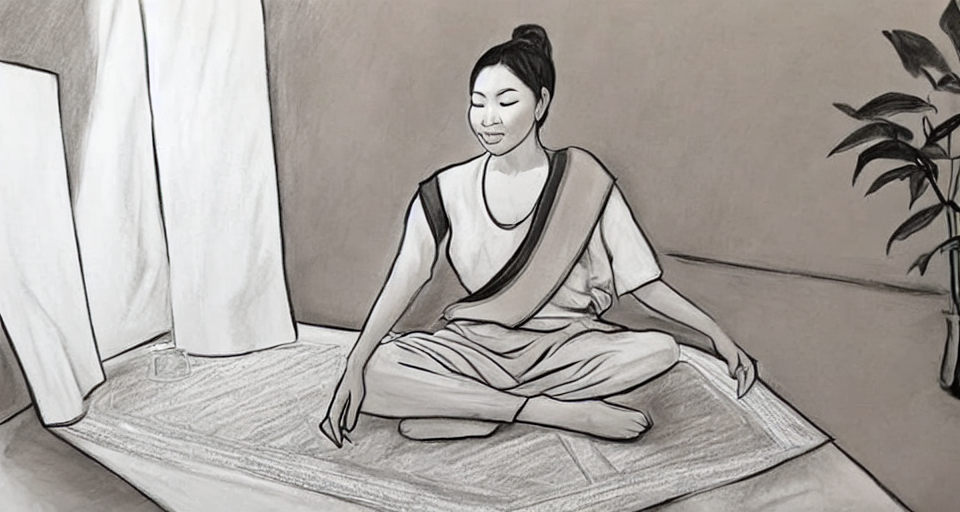

In [23]:
# Prototype Code cell
# prototype_prompt = "pouring tea to cup on the table near the laptop, anime art style"
original_image = Image.open(f"./datasets/frames/original_frames/{image_name_no_extension}.mp4/frame_0.jpg")

torch.manual_seed(seed)
img = img_2_img_pipe(
    prompt=prompt,
    image=original_image,
    negative_prompt=negative_prompt,
    strength=0.73,
    guidance_scale=8,
    # num_inference_steps=num_of_inference    
    )
img.images[0]

In [80]:
path_to_ai_stylized_frames = f'{DS_PATH + FRAMES_PATH + AI_STYLIZED_F_PATH}/{image_name}'

if not os.path.exists(path_to_ai_stylized_frames):
    os.makedirs(path_to_ai_stylized_frames)

step = 1 + number_of_missed_frames_per_generation

art_style = art_styles[1]
artist = artists_and_characteristics[4]

video_prompt = f'(({art_style} {artist[0]})). {prompt} {artist[1]}'
video_negative_prompt = f'{artist[1]} {negative_prompt}'
video_strength = (strength_list[0] + strength_list[1])/2
video_guidance = (guidance_list[0] + guidance_list[1])/2
video_seed = seed

print(f'Prompt: {video_prompt}')
print(f'Negative Prompt: {video_negative_prompt}')
print(f'Strength: {video_strength}')
print(f'Guidance: {video_guidance}')
print(f'Seed: {video_seed}')

for i in range(0,number_of_frames,step):
    original_image = Image.open(f"./{path_to_original_frames}/frame_{i}.jpg")

    torch.manual_seed(seed)
    img = img_2_img_pipe(
        prompt=video_prompt,
        image=original_image,
        negative_prompt=video_negative_prompt,
        strength=video_strength,
        guidance_scale=video_guidance,
        )
    img.images[0].save(f"./{path_to_ai_stylized_frames}/frame_{i}.jpg")
    print(i)

Prompt: ((drawing made with crayons by Malcolm Liepke)). Blonde young woman in a grey coat and white shirt taking a photo with camera. red, black, saturated
Negative Prompt: red, black, saturated (sunglasses, glasses), blurry, blown-out, speckles, noise, dust, blotches, deformed face, dismembered, ugly, maximalistic
Strength: 0.665
Guidance: 9.0
Seed: 1026


100%|██████████| 33/33 [00:05<00:00,  6.60it/s]


In [32]:
path_to_ai_stylized_frames = f'{DS_PATH + FRAMES_PATH + AI_STYLIZED_F_PATH}/{image_name}'

if not os.path.exists(path_to_ai_stylized_frames):
    os.makedirs(path_to_ai_stylized_frames)

step = 1 + number_of_missed_frames_per_generation
for i in range(0,number_of_frames,step):
    original_image = Image.open(f"./{path_to_original_frames}/frame_{i}.jpg")

    torch.manual_seed(seed)
    img = img_2_img_pipe(
        prompt=prompt,
        image=original_image,
        negative_prompt=negative_prompt,
        strength=image_strength,
        guidance_scale=prompt_guidance,
        
        )
    img.images[0].save(f"./{path_to_ai_stylized_frames}/frame_{i}.jpg")

100%|██████████| 37/37 [00:17<00:00,  2.06it/s]


# Images to video conversion

In [81]:
def imgs_to_video(imgs, image_name='video.mp4', fps=9, video_dims = (512, 512)):
    # Source: https://stackoverflow.com/questions/52414148/turn-pil-images-into-video-on-linux
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')    
    video = cv2.VideoWriter(image_name, fourcc, fps, video_dims)
    for img in imgs:
        tmp_img = img.copy()
        video.write(cv2.cvtColor(np.array(tmp_img), cv2.COLOR_RGB2BGR))
    video.release()

In [82]:
image_dims = Image.open(f"./{path_to_ai_stylized_frames}/frame_0.jpg").size
print(image_dims)

(512, 512)


In [83]:
images = list()

for j in range(0, number_of_frames, step):
    images.append(Image.open(f"./{path_to_ai_stylized_frames}/frame_{j}.jpg"))

imgs_to_video(
    imgs=images, 
    image_name=f'{DS_PATH + VIDEO_PATH + OUT_VID_PATH}/ai_stylized_{art_style}_{artist[0]}_strgh{video_strength}_gidnc{video_guidance}_seed{video_seed}_{image_name}',
    fps=15,
    video_dims=image_dims,
    )

In [84]:
path_to_ai_stylized_frames = f'{DS_PATH + FRAMES_PATH + AI_STYLIZED_F_PATH}/{image_name}'

if not os.path.exists(path_to_ai_stylized_frames):
    os.makedirs(path_to_ai_stylized_frames)

step = 1 + number_of_missed_frames_per_generation

art_style = art_styles[1]
artist = artists_and_characteristics[4]

video_prompt = f'(({art_style} {artist[0]})). {prompt} {artist[1]}'
video_negative_prompt = f'{artist[1]} {negative_prompt}'
for video_strength in [strength_list[0], strength_list[1]]:
    for video_guidance in [guidance_list[0], guidance_list[1]]:
        # video_strength = (strength_list[0] + strength_list[1])/2
        # video_guidance = (guidance_list[0] + guidance_list[1])/2
        video_seed = seed

        print(f'Prompt: {video_prompt}')
        print(f'Negative Prompt: {video_negative_prompt}')
        print(f'Strength: {video_strength}')
        print(f'Guidance: {video_guidance}')
        print(f'Seed: {video_seed}')

        for i in range(0,number_of_frames,step):
            original_image = Image.open(f"./{path_to_original_frames}/frame_{i}.jpg")

            torch.manual_seed(seed)
            img = img_2_img_pipe(
                prompt=video_prompt,
                image=original_image,
                negative_prompt=video_negative_prompt,
                strength=video_strength,
                guidance_scale=video_guidance,
                )
            img.images[0].save(f"./{path_to_ai_stylized_frames}/frame_{i}.jpg")
            print(i)

        image_dims = Image.open(f"./{path_to_ai_stylized_frames}/frame_0.jpg").size
        print(image_dims)

        images = list()

        for j in range(0, number_of_frames, step):
            images.append(Image.open(f"./{path_to_ai_stylized_frames}/frame_{j}.jpg"))

        imgs_to_video(
            imgs=images, 
            image_name=f'{DS_PATH + VIDEO_PATH + OUT_VID_PATH}/ai_stylized_{art_style}_{artist[0]}_strgh{video_strength}_gidnc{video_guidance}_seed{video_seed}_{image_name}',
            fps=15,
            video_dims=image_dims,
            )

Prompt: ((drawing made with crayons by Malcolm Liepke)). Blonde young woman in a grey coat and white shirt taking a photo with camera. red, black, saturated
Negative Prompt: red, black, saturated (sunglasses, glasses), blurry, blown-out, speckles, noise, dust, blotches, deformed face, dismembered, ugly, maximalistic
Strength: 0.63
Guidance: 7
Seed: 1026


100%|██████████| 31/31 [00:04<00:00,  6.51it/s]


0


100%|██████████| 31/31 [00:04<00:00,  6.51it/s]


2


100%|██████████| 31/31 [00:04<00:00,  6.50it/s]


4


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


6


100%|██████████| 31/31 [00:04<00:00,  6.50it/s]


8


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


10


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


12


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


14


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


16


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


18


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


20


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


22


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


24


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


26


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


28


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


30


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


32


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


34


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


36


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


38


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


40


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


42


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


44


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


46


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


48


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


50


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


52


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


54


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


56


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


58


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


60


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


62


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


64


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


66


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


68


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


70


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


72


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


74


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


76


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


78


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


80


100%|██████████| 31/31 [00:04<00:00,  6.50it/s]


82


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


84


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


86


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


88


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


90


100%|██████████| 31/31 [00:04<00:00,  6.49it/s]


92


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


94


100%|██████████| 31/31 [00:04<00:00,  6.46it/s]


96


100%|██████████| 31/31 [00:04<00:00,  6.46it/s]


98


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


100


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


102


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


104


100%|██████████| 31/31 [00:04<00:00,  6.57it/s]


106


100%|██████████| 31/31 [00:04<00:00,  6.67it/s]


108


100%|██████████| 31/31 [00:04<00:00,  6.67it/s]


110


100%|██████████| 31/31 [00:04<00:00,  6.63it/s]


112


100%|██████████| 31/31 [00:04<00:00,  6.62it/s]


114


100%|██████████| 31/31 [00:04<00:00,  6.67it/s]


116


100%|██████████| 31/31 [00:04<00:00,  6.62it/s]


118


100%|██████████| 31/31 [00:04<00:00,  6.59it/s]


120


100%|██████████| 31/31 [00:04<00:00,  6.60it/s]


122


100%|██████████| 31/31 [00:04<00:00,  6.58it/s]


124


100%|██████████| 31/31 [00:04<00:00,  6.59it/s]


126


100%|██████████| 31/31 [00:04<00:00,  6.56it/s]


128


100%|██████████| 31/31 [00:04<00:00,  6.60it/s]


130


100%|██████████| 31/31 [00:04<00:00,  6.57it/s]


132


100%|██████████| 31/31 [00:04<00:00,  6.60it/s]


134


100%|██████████| 31/31 [00:04<00:00,  6.32it/s]


136


100%|██████████| 31/31 [00:05<00:00,  5.92it/s]


138


100%|██████████| 31/31 [00:05<00:00,  5.92it/s]


140


100%|██████████| 31/31 [00:05<00:00,  5.93it/s]


142


100%|██████████| 31/31 [00:05<00:00,  5.93it/s]


144


100%|██████████| 31/31 [00:05<00:00,  5.94it/s]


146


100%|██████████| 31/31 [00:05<00:00,  5.94it/s]


148


100%|██████████| 31/31 [00:05<00:00,  5.93it/s]


150


100%|██████████| 31/31 [00:05<00:00,  6.03it/s]


152
(512, 512)
Prompt: ((drawing made with crayons by Malcolm Liepke)). Blonde young woman in a grey coat and white shirt taking a photo with camera. red, black, saturated
Negative Prompt: red, black, saturated (sunglasses, glasses), blurry, blown-out, speckles, noise, dust, blotches, deformed face, dismembered, ugly, maximalistic
Strength: 0.63
Guidance: 11
Seed: 1026


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


0


100%|██████████| 31/31 [00:04<00:00,  6.23it/s]


2


100%|██████████| 31/31 [00:04<00:00,  6.53it/s]


4


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


6


100%|██████████| 31/31 [00:04<00:00,  6.38it/s]


8


100%|██████████| 31/31 [00:04<00:00,  6.52it/s]


10


100%|██████████| 31/31 [00:04<00:00,  6.56it/s]


12


100%|██████████| 31/31 [00:04<00:00,  6.48it/s]


14


100%|██████████| 31/31 [00:04<00:00,  6.35it/s]


16


100%|██████████| 31/31 [00:05<00:00,  6.18it/s]


18


100%|██████████| 31/31 [00:04<00:00,  6.46it/s]


20


100%|██████████| 31/31 [00:04<00:00,  6.34it/s]


22


100%|██████████| 31/31 [00:05<00:00,  6.00it/s]


24


100%|██████████| 31/31 [00:05<00:00,  5.96it/s]


26


100%|██████████| 31/31 [00:05<00:00,  5.98it/s]


28


100%|██████████| 31/31 [00:04<00:00,  6.21it/s]


30


100%|██████████| 31/31 [00:05<00:00,  6.06it/s]


32


100%|██████████| 31/31 [00:04<00:00,  6.31it/s]


34


100%|██████████| 31/31 [00:05<00:00,  6.12it/s]


36


100%|██████████| 31/31 [00:04<00:00,  6.32it/s]


38


100%|██████████| 31/31 [00:04<00:00,  6.36it/s]


40


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


42


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


44


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


46


100%|██████████| 31/31 [00:04<00:00,  6.20it/s]


48


100%|██████████| 31/31 [00:05<00:00,  6.09it/s]


50


100%|██████████| 31/31 [00:05<00:00,  6.16it/s]


52


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


54


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


56


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


58


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


60


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


62


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


64


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


66


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


68


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


70


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


72


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


74


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


76


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


78


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


80


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


82


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


84


100%|██████████| 31/31 [00:05<00:00,  5.97it/s]


86


100%|██████████| 31/31 [00:05<00:00,  6.17it/s]


88


100%|██████████| 31/31 [00:04<00:00,  6.40it/s]


90


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


92


100%|██████████| 31/31 [00:04<00:00,  6.36it/s]


94


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


96


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


98


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


100


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


102


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


104


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


106


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


108


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


110


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


112


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


114


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


116


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


118


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


120


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


122


100%|██████████| 31/31 [00:04<00:00,  6.45it/s]


124


100%|██████████| 31/31 [00:04<00:00,  6.35it/s]


126


100%|██████████| 31/31 [00:04<00:00,  6.51it/s]


128


100%|██████████| 31/31 [00:04<00:00,  6.47it/s]


130


100%|██████████| 31/31 [00:04<00:00,  6.50it/s]


132


100%|██████████| 31/31 [00:04<00:00,  6.34it/s]


134


100%|██████████| 31/31 [00:04<00:00,  6.37it/s]


136


100%|██████████| 31/31 [00:04<00:00,  6.30it/s]


138


100%|██████████| 31/31 [00:04<00:00,  6.42it/s]


140


100%|██████████| 31/31 [00:04<00:00,  6.42it/s]


142


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


144


100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


146


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


148


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


150


100%|██████████| 31/31 [00:04<00:00,  6.44it/s]


152
(512, 512)
Prompt: ((drawing made with crayons by Malcolm Liepke)). Blonde young woman in a grey coat and white shirt taking a photo with camera. red, black, saturated
Negative Prompt: red, black, saturated (sunglasses, glasses), blurry, blown-out, speckles, noise, dust, blotches, deformed face, dismembered, ugly, maximalistic
Strength: 0.7
Guidance: 7
Seed: 1026


100%|██████████| 35/35 [00:05<00:00,  6.49it/s]


0


100%|██████████| 35/35 [00:05<00:00,  6.15it/s]


2


100%|██████████| 35/35 [00:05<00:00,  6.26it/s]


4


100%|██████████| 35/35 [00:05<00:00,  6.43it/s]


6


100%|██████████| 35/35 [00:05<00:00,  6.43it/s]


8


100%|██████████| 35/35 [00:05<00:00,  6.46it/s]


10


100%|██████████| 35/35 [00:05<00:00,  6.47it/s]


12


100%|██████████| 35/35 [00:05<00:00,  6.42it/s]


14


100%|██████████| 35/35 [00:05<00:00,  6.44it/s]


16


100%|██████████| 35/35 [00:05<00:00,  6.28it/s]


18


100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


20


100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


22


100%|██████████| 35/35 [00:05<00:00,  6.38it/s]


24


100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


26


100%|██████████| 35/35 [00:05<00:00,  6.35it/s]


28


100%|██████████| 35/35 [00:05<00:00,  6.25it/s]


30


100%|██████████| 35/35 [00:05<00:00,  6.04it/s]


32


100%|██████████| 35/35 [00:05<00:00,  6.31it/s]


34


100%|██████████| 35/35 [00:05<00:00,  6.16it/s]


36


100%|██████████| 35/35 [00:05<00:00,  6.25it/s]


38


100%|██████████| 35/35 [00:05<00:00,  6.52it/s]


40


100%|██████████| 35/35 [00:05<00:00,  6.47it/s]


42


100%|██████████| 35/35 [00:05<00:00,  6.50it/s]


44


100%|██████████| 35/35 [00:05<00:00,  6.52it/s]


46


100%|██████████| 35/35 [00:05<00:00,  6.52it/s]


48


100%|██████████| 35/35 [00:05<00:00,  6.52it/s]


50


100%|██████████| 35/35 [00:05<00:00,  6.52it/s]


52


100%|██████████| 35/35 [00:05<00:00,  6.51it/s]


54


100%|██████████| 35/35 [00:05<00:00,  6.52it/s]


56


100%|██████████| 35/35 [00:05<00:00,  6.52it/s]


58


100%|██████████| 35/35 [00:05<00:00,  6.50it/s]


60


100%|██████████| 35/35 [00:05<00:00,  6.74it/s]


62


100%|██████████| 35/35 [00:05<00:00,  6.66it/s]


64


100%|██████████| 35/35 [00:05<00:00,  6.77it/s]


66


100%|██████████| 35/35 [00:05<00:00,  6.65it/s]


68


100%|██████████| 35/35 [00:05<00:00,  6.63it/s]


70


100%|██████████| 35/35 [00:05<00:00,  6.90it/s]


72


100%|██████████| 35/35 [00:05<00:00,  6.59it/s]


74


100%|██████████| 35/35 [00:05<00:00,  6.49it/s]


76


100%|██████████| 35/35 [00:05<00:00,  6.65it/s]


78


100%|██████████| 35/35 [00:05<00:00,  6.53it/s]


80


100%|██████████| 35/35 [00:05<00:00,  6.11it/s]


82


100%|██████████| 35/35 [00:05<00:00,  6.04it/s]


84


100%|██████████| 35/35 [00:05<00:00,  6.33it/s]


86


100%|██████████| 35/35 [00:05<00:00,  6.39it/s]


88


100%|██████████| 35/35 [00:05<00:00,  6.50it/s]


90


100%|██████████| 35/35 [00:05<00:00,  6.59it/s]


92


100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


94


100%|██████████| 35/35 [00:05<00:00,  6.62it/s]


96


100%|██████████| 35/35 [00:05<00:00,  6.55it/s]


98


100%|██████████| 35/35 [00:05<00:00,  6.58it/s]


100


100%|██████████| 35/35 [00:05<00:00,  6.64it/s]


102


100%|██████████| 35/35 [00:05<00:00,  6.98it/s]


104


100%|██████████| 35/35 [00:05<00:00,  6.71it/s]


106


100%|██████████| 35/35 [00:05<00:00,  6.74it/s]


108


100%|██████████| 35/35 [00:05<00:00,  6.84it/s]


110


100%|██████████| 35/35 [00:05<00:00,  6.84it/s]


112


100%|██████████| 35/35 [00:05<00:00,  6.65it/s]


114


100%|██████████| 35/35 [00:05<00:00,  6.84it/s]


116


100%|██████████| 35/35 [00:05<00:00,  6.87it/s]


118


100%|██████████| 35/35 [00:05<00:00,  6.87it/s]


120


100%|██████████| 35/35 [00:05<00:00,  6.79it/s]


122


100%|██████████| 35/35 [00:05<00:00,  6.97it/s]


124


100%|██████████| 35/35 [00:05<00:00,  6.52it/s]


126


100%|██████████| 35/35 [00:05<00:00,  6.54it/s]


128


100%|██████████| 35/35 [00:05<00:00,  6.49it/s]


130


100%|██████████| 35/35 [00:05<00:00,  6.61it/s]


132


100%|██████████| 35/35 [00:05<00:00,  6.58it/s]


134


100%|██████████| 35/35 [00:05<00:00,  6.57it/s]


136


100%|██████████| 35/35 [00:05<00:00,  6.56it/s]


138


100%|██████████| 35/35 [00:05<00:00,  6.62it/s]


140


100%|██████████| 35/35 [00:05<00:00,  6.61it/s]


142


100%|██████████| 35/35 [00:05<00:00,  6.61it/s]


144


100%|██████████| 35/35 [00:05<00:00,  6.62it/s]


146


100%|██████████| 35/35 [00:05<00:00,  6.61it/s]


148


100%|██████████| 35/35 [00:05<00:00,  6.61it/s]


150


100%|██████████| 35/35 [00:05<00:00,  6.62it/s]


152
(512, 512)
Prompt: ((drawing made with crayons by Malcolm Liepke)). Blonde young woman in a grey coat and white shirt taking a photo with camera. red, black, saturated
Negative Prompt: red, black, saturated (sunglasses, glasses), blurry, blown-out, speckles, noise, dust, blotches, deformed face, dismembered, ugly, maximalistic
Strength: 0.7
Guidance: 11
Seed: 1026


100%|██████████| 35/35 [00:05<00:00,  6.62it/s]


0


100%|██████████| 35/35 [00:05<00:00,  6.55it/s]


2


100%|██████████| 35/35 [00:05<00:00,  6.59it/s]


4


100%|██████████| 35/35 [00:05<00:00,  6.49it/s]


6


100%|██████████| 35/35 [00:05<00:00,  6.46it/s]


8


100%|██████████| 35/35 [00:05<00:00,  6.55it/s]


10


100%|██████████| 35/35 [00:05<00:00,  6.58it/s]


12


100%|██████████| 35/35 [00:05<00:00,  6.62it/s]


14


100%|██████████| 35/35 [00:05<00:00,  6.43it/s]


16


100%|██████████| 35/35 [00:05<00:00,  6.56it/s]


18


100%|██████████| 35/35 [00:05<00:00,  6.58it/s]


20


100%|██████████| 35/35 [00:05<00:00,  6.51it/s]


22


100%|██████████| 35/35 [00:05<00:00,  6.95it/s]


24


100%|██████████| 35/35 [00:05<00:00,  6.95it/s]


26


100%|██████████| 35/35 [00:04<00:00,  7.05it/s]


28


100%|██████████| 35/35 [00:05<00:00,  6.85it/s]


30


100%|██████████| 35/35 [00:05<00:00,  6.75it/s]


32


100%|██████████| 35/35 [00:05<00:00,  6.78it/s]


34


100%|██████████| 35/35 [00:05<00:00,  6.77it/s]


36


100%|██████████| 35/35 [00:05<00:00,  6.69it/s]


38


100%|██████████| 35/35 [00:05<00:00,  6.77it/s]


40


100%|██████████| 35/35 [00:05<00:00,  6.84it/s]


42


100%|██████████| 35/35 [00:04<00:00,  7.04it/s]


44


100%|██████████| 35/35 [00:05<00:00,  6.92it/s]


46


100%|██████████| 35/35 [00:05<00:00,  6.77it/s]


48


100%|██████████| 35/35 [00:05<00:00,  6.86it/s]


50


100%|██████████| 35/35 [00:05<00:00,  6.82it/s]


52


100%|██████████| 35/35 [00:05<00:00,  6.86it/s]


54


100%|██████████| 35/35 [00:05<00:00,  6.60it/s]


56


100%|██████████| 35/35 [00:05<00:00,  6.62it/s]


58


100%|██████████| 35/35 [00:05<00:00,  6.84it/s]


60


100%|██████████| 35/35 [00:05<00:00,  6.78it/s]


62


100%|██████████| 35/35 [00:05<00:00,  6.71it/s]


64


100%|██████████| 35/35 [00:04<00:00,  7.00it/s]


66


100%|██████████| 35/35 [00:05<00:00,  6.88it/s]


68


100%|██████████| 35/35 [00:05<00:00,  6.79it/s]


70


100%|██████████| 35/35 [00:05<00:00,  6.88it/s]


72


100%|██████████| 35/35 [00:05<00:00,  6.77it/s]


74


100%|██████████| 35/35 [00:05<00:00,  6.80it/s]


76


100%|██████████| 35/35 [00:05<00:00,  6.71it/s]


78


100%|██████████| 35/35 [00:05<00:00,  6.79it/s]


80


100%|██████████| 35/35 [00:05<00:00,  6.70it/s]


82


100%|██████████| 35/35 [00:05<00:00,  6.64it/s]


84


100%|██████████| 35/35 [00:05<00:00,  6.89it/s]


86


100%|██████████| 35/35 [00:05<00:00,  6.81it/s]


88


100%|██████████| 35/35 [00:05<00:00,  6.98it/s]


90


100%|██████████| 35/35 [00:05<00:00,  6.74it/s]


92


100%|██████████| 35/35 [00:05<00:00,  6.82it/s]


94


100%|██████████| 35/35 [00:05<00:00,  6.90it/s]


96


100%|██████████| 35/35 [00:05<00:00,  6.95it/s]


98


100%|██████████| 35/35 [00:05<00:00,  6.86it/s]


100


100%|██████████| 35/35 [00:05<00:00,  6.81it/s]


102


100%|██████████| 35/35 [00:05<00:00,  6.81it/s]


104


100%|██████████| 35/35 [00:05<00:00,  6.85it/s]


106


100%|██████████| 35/35 [00:05<00:00,  6.93it/s]


108


100%|██████████| 35/35 [00:05<00:00,  6.69it/s]


110


100%|██████████| 35/35 [00:05<00:00,  6.65it/s]


112


100%|██████████| 35/35 [00:05<00:00,  6.80it/s]


114


100%|██████████| 35/35 [00:05<00:00,  6.47it/s]


116


100%|██████████| 35/35 [00:05<00:00,  6.42it/s]


118


100%|██████████| 35/35 [00:05<00:00,  6.42it/s]


120


100%|██████████| 35/35 [00:05<00:00,  6.60it/s]


122


100%|██████████| 35/35 [00:05<00:00,  6.78it/s]


124


100%|██████████| 35/35 [00:05<00:00,  6.75it/s]


126


100%|██████████| 35/35 [00:05<00:00,  6.84it/s]


128


100%|██████████| 35/35 [00:05<00:00,  6.87it/s]


130


100%|██████████| 35/35 [00:05<00:00,  6.96it/s]


132


100%|██████████| 35/35 [00:05<00:00,  6.68it/s]


134


100%|██████████| 35/35 [00:05<00:00,  6.69it/s]


136


100%|██████████| 35/35 [00:05<00:00,  6.73it/s]


138


100%|██████████| 35/35 [00:05<00:00,  6.73it/s]


140


100%|██████████| 35/35 [00:05<00:00,  6.82it/s]


142


100%|██████████| 35/35 [00:05<00:00,  6.93it/s]


144


100%|██████████| 35/35 [00:04<00:00,  7.01it/s]


146


100%|██████████| 35/35 [00:05<00:00,  6.99it/s]


148


100%|██████████| 35/35 [00:05<00:00,  6.96it/s]


150


100%|██████████| 35/35 [00:05<00:00,  6.87it/s]


152
(512, 512)
